In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('unrate.csv')
data.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [5]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month
data.head()

,DATE,UNRATE,YEAR,MONTH
0,1948-01-01,3.4,1948,1
1,1948-02-01,3.8,1948,2
2,1948-03-01,4.0,1948,3
3,1948-04-01,3.9,1948,4
4,1948-05-01,3.5,1948,5


In [23]:
this_century_data = data[data['YEAR'] >= 2000]
this_century_data.head()

,DATE,UNRATE,YEAR,MONTH
624,2000-01-01,4.0,2000,1
625,2000-02-01,4.1,2000,2
626,2000-03-01,4.0,2000,3
627,2000-04-01,3.8,2000,4
628,2000-05-01,4.0,2000,5


In [27]:
this_century_data = this_century_data[this_century_data['YEAR'] >= 2002]
this_century_data.head()

,DATE,UNRATE,YEAR,MONTH
648,2002-01-01,5.7,2002,1
649,2002-02-01,5.7,2002,2
650,2002-03-01,5.7,2002,3
651,2002-04-01,5.9,2002,4
652,2002-05-01,5.8,2002,5


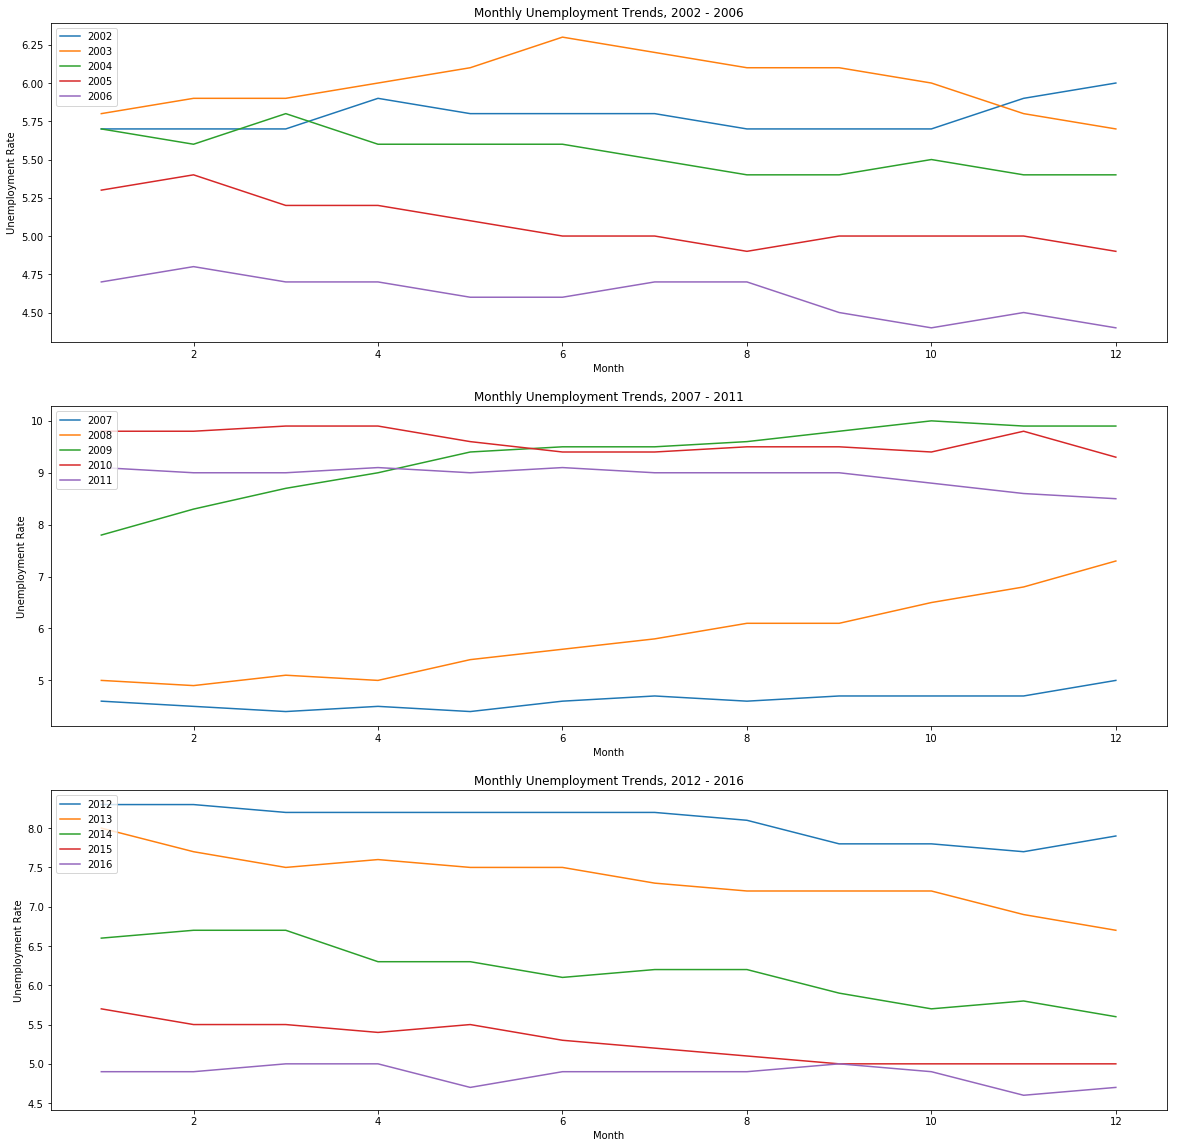

In [44]:
MONTH_IN_PERIOD = 60
fig = plt.figure(figsize=(20, 20))
axes = []
for i in range(3):
    axes.append(fig.add_subplot(3, 1, i+1))
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Unemployment Rate')
    axes[i].set_title('Monthly Unemployment Trends, ' + str(this_century_data.iloc[i * MONTH_IN_PERIOD]['YEAR']) + ' - ' + 
                      str(this_century_data.iloc[i * MONTH_IN_PERIOD + MONTH_IN_PERIOD - 1]['YEAR']))
    for j in range(5):
        first_range = j*12 + i * MONTH_IN_PERIOD
        end_range = (j+1)*12 + i * MONTH_IN_PERIOD
        subset = this_century_data[first_range:end_range]
        axes[i].plot(subset['MONTH'], subset['UNRATE'],
                 label=this_century_data.iloc[first_range]['YEAR'])
    axes[i].legend(loc='upper left')


plt.show()

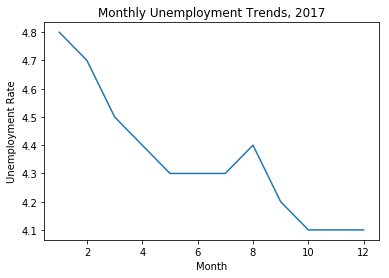

In [47]:
last_year = data[data['YEAR'] == 2017]
plt.plot(last_year['MONTH'], last_year['UNRATE'])
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends, 2017')
plt.show()